# Predictive Analytics

 In this notebook we build several models to predict the future demand based on different features of the dataset.
 
 We first demonstrate linear regression as a benchmark and then continue with more complex models. For each of the more complex models, the three steps of feature engineering, model building and model evaluation were followed, where model building also includes finding the optimal hyperparameters.
 
 This notebook is structured as follows:
 
 **Linear Regression as a Benchmark**
 - Demand on hourly basis
 - Demand on daily basis
 - Multiple feature analysis

 
 **Polynomial Regression**
 - Find ideal hyperparameters (degree)
 - Polynomial regression with ideal degree
 - Test set performance


 **Lasso Regression ($L_1$ regularization)**
 - Find ideal hyperparameters (degree and regularization parameter)
 - Lasso regression with ideal hyperparameters
 - Test set performance
 
 
 **Ridge Regression ($L_2$ Regularization)**
 - Find ideal hyperparameters (degree and regularization parameter)
 - Ridge regression with ideal hyperparameters
 - Test set performance
 
 
 **Tree Regression**
 - Find ideal hyperparameters (maximal tree depth)
 - Tree regression with ideal maximal tree depth
 - Test set performance
 
 

### Importing the Datasets and the libraries needed for the prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

feature_set = pd.read_pickle("Data/feature_set.pickle")
feature_set_daily = pd.read_pickle("Data/feature_set_daily.pickle")

In [2]:
feature_set.head()

,day,hour,trips,minutes_driven,max_temp,precip,is_weekday
0,2018-01-01,0,25.0,738.0,14.4,0.0,1
1,2018-01-01,1,24.0,1171.0,14.4,0.0,1
2,2018-01-01,2,12.0,232.0,14.4,0.0,1
3,2018-01-01,3,3.0,41.0,14.4,0.0,1
4,2018-01-01,4,4.0,23.0,14.4,0.0,1


In [3]:
feature_set_daily.head()

,day,trips,minutes_driven,max_temp,precip,hours_of_precip,is_weekday
0,2018-01-01,766.0,35707.0,13.8,0.0,0.0,1
1,2018-01-02,770.0,13811.0,16.9,0.0,0.0,1
2,2018-01-03,715.0,15355.0,12.1,0.0,0.0,1
3,2018-01-04,639.0,22522.0,13.8,0.0,0.0,0
4,2018-01-05,710.0,17254.0,14.1,1.0,2.0,1


### Linear Regression as a Benchmark
Since linear regression is the most naive approach, we can use it as a benchmark for the more complex models. First, we need to split our dataset into training and test datasets (later we also include validation sets). Since we wanted to make our result reproducible, we chose a specific random state. random_state 662 was chosen because it splits the dataset into homogeneous subsets. This is important because we have very few data points that relate to, for example, a day with precipitation. If these days are unevenly represented in the training set, we cannot accurately predict demand on these days.

In [4]:
X = feature_set["max_temp"]
y = feature_set["trips"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=662)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=(0.2/0.7),random_state=662)

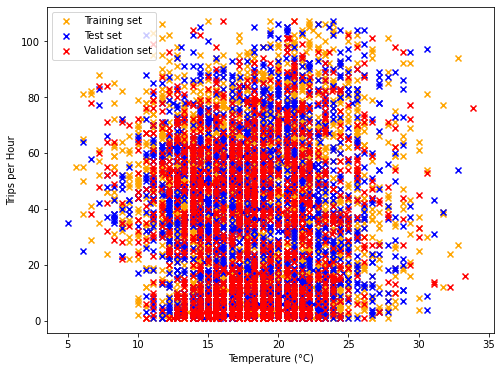

In [5]:
plt.figure(figsize = (8,6))
plt.scatter(X_train, y_train, marker='x', color="orange")
plt.scatter(X_test, y_test, marker='x', color="b")
plt.scatter(X_val, y_val, marker='x', color="r")
plt.xlabel("Temperature (°C)")
plt.ylabel("Trips per Hour")
plt.legend(['Training set', 'Test set', 'Validation set'])
plt.show()

In [6]:
model = LinearRegression(fit_intercept =True)
model.fit(X_train.values.reshape(-1,1),y_train)
model_pred = model.predict(X_test.values.reshape(-1,1))

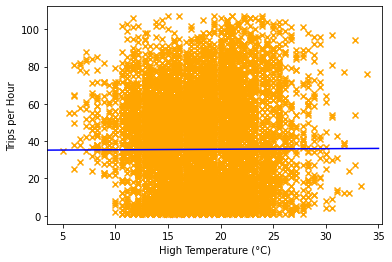

Coefficients  [0.02919996] 
Intercept  35.10704892690436


In [7]:
plt.scatter( X,y, marker = 'x', c='orange')
xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())

Z = np.linspace(0,35)
T = model.intercept_ + model.coef_*Z

plt.plot(Z,T, c="b")
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel("High Temperature (°C)")
plt.ylabel("Trips per Hour")
plt.show()
print("Coefficients ", model.coef_, "\nIntercept ", model.intercept_ )

In [8]:
print("Test set performance:")

print("MSE:", mean_squared_error(y_test, model_pred))
print("MAE:", mean_absolute_error(y_test, model_pred))
print("R2: ", r2_score(y_test, model_pred))

Test set performance:
MSE: 718.646337737232
MAE: 22.882002141441422
R2:  4.272814301764516e-05


As expected (Data_Visualization), the linear model cannot describe the demand with the feature temperature.

##### Demand on a daily basis (for comparison)

In [9]:
X_daily = feature_set_daily["max_temp"]
y_daily = feature_set_daily["trips"]
X_train_daily, X_test_daily, y_train_daily, y_test_daily = train_test_split(X_daily, y_daily, test_size=0.3, random_state=662) 

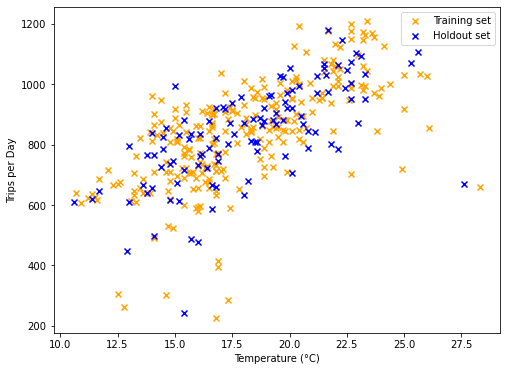

In [10]:
plt.figure(figsize = (8,6))
plt.scatter(X_train_daily, y_train_daily, marker='x', color="orange")
plt.scatter(X_test_daily, y_test_daily, marker='x', color="b")
plt.xlabel("Temperature (°C)")
plt.ylabel("Trips per Day")
plt.legend(['Training set', 'Holdout set'])
plt.show()

In [11]:
model = LinearRegression(fit_intercept =True)
model.fit(X_train_daily.values.reshape(-1,1),y_train_daily)
model_pred = model.predict(X_test_daily.values.reshape(-1,1))

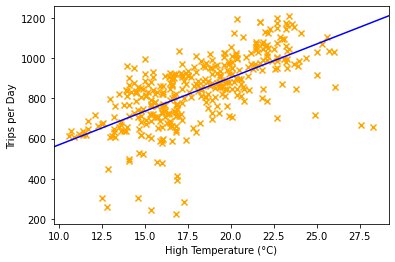

Coefficients  [33.40107779] 
Intercept  234.72555097466716


In [12]:
plt.scatter( X_daily,y_daily, marker = 'x', c='orange')
xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())

Z = np.linspace(0,35)
T = model.intercept_ + model.coef_*Z

plt.plot(Z,T, c="b")
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel("High Temperature (°C)")
plt.ylabel("Trips per Day")
plt.show()
print("Coefficients ", model.coef_, "\nIntercept ", model.intercept_ )

In [13]:
print("Test set performance:")

print("MSE:", mean_squared_error(y_test_daily, model_pred))
print("MAE:", mean_absolute_error(y_test_daily, model_pred))
print("R2: ", r2_score(y_test_daily, model_pred))

Test set performance:
MSE: 15030.905519587664
MAE: 88.40367813372443
R2:  0.438922915152276


As we can see, the performance improves significantly when the time of day is no longer considered. Furthermore, the positive linear relationship between the number of trips and the maximum temperature becomes observable. If we exclude other features, we could improve our test performance even more. 

In [14]:
X_daily = feature_set_daily["hours_of_precip"]
y_daily = feature_set_daily["trips"]
X_train_daily, X_test_daily, y_train_daily, y_test_daily = train_test_split(X_daily, y_daily, test_size=0.3, random_state=662) 

In [15]:
model = LinearRegression(fit_intercept =True)
model.fit(X_train_daily.values.reshape(-1,1),y_train_daily)
model_pred = model.predict(X_test_daily.values.reshape(-1,1))

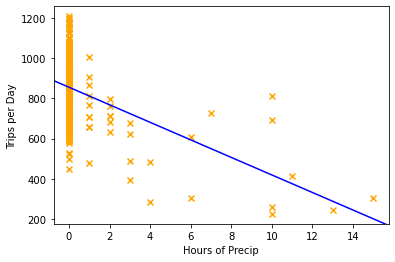

Coefficients  [-43.57815098] 
Intercept  855.4132348874288


In [16]:
plt.scatter( X_daily,y_daily, marker = 'x', c='orange')
xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())

Z = np.linspace(-1,16)
T = model.intercept_ + model.coef_*Z

plt.plot(Z,T, c="b")
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel("Hours of Precip")
plt.ylabel("Trips per Day")
plt.show()
print("Coefficients ", model.coef_, "\nIntercept ", model.intercept_ )

In [17]:
print("Test set performance:")

print("MSE:", mean_squared_error(y_test_daily, model_pred))
print("MAE:", mean_absolute_error(y_test_daily, model_pred))
print("R2: ", r2_score(y_test_daily, model_pred))

Test set performance:
MSE: 21887.40565450462
MAE: 118.4876394475095
R2:  0.1829819072772717


Since there is also a negative linear relationship between precipitation hours and demand, we could improve performance by excluding these days. 

In [18]:
no_precip = feature_set_daily[feature_set_daily["precip"]==0]
X_daily = no_precip["max_temp"]
y_daily = no_precip["trips"]
X_train_daily, X_test_daily, y_train_daily, y_test_daily = train_test_split(X_daily, y_daily, test_size=0.3, random_state=662)

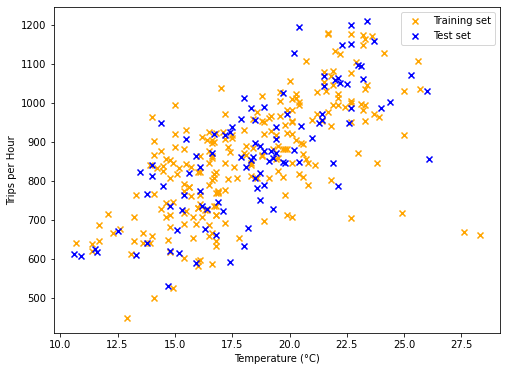

In [19]:
plt.figure(figsize = (8,6))
plt.scatter(X_train_daily, y_train_daily, marker='x', color="orange")
plt.scatter(X_test_daily, y_test_daily, marker='x', color="b")
# plt.scatter(X_val, y_val, marker='x', color="r")
plt.xlabel("Temperature (°C)")
plt.ylabel("Trips per Hour")
plt.legend(['Training set', 'Test set'])
plt.show()

In [20]:
model = LinearRegression(fit_intercept =True)
model.fit(X_train_daily.values.reshape(-1,1),y_train_daily)
model_pred = model.predict(X_test_daily.values.reshape(-1,1))

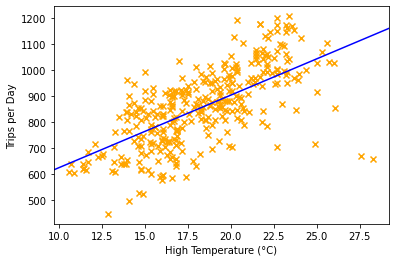

Coefficients  [27.91070532] 
Intercept  346.12069742279965


In [21]:
plt.scatter( X_daily,y_daily, marker = 'x', c='orange')
xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())

Z = np.linspace(9,30)
T = model.intercept_ + model.coef_*Z

plt.plot(Z,T, c="b")
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel("High Temperature (°C)")
plt.ylabel("Trips per Day")
plt.show()
print("Coefficients ", model.coef_, "\nIntercept ", model.intercept_ )

In [22]:
print("Test set performance:")

print("MSE:", mean_squared_error(y_test_daily, model_pred))
print("MAE:", mean_absolute_error(y_test_daily, model_pred))
print("R2: ", r2_score(y_test_daily, model_pred))

Test set performance:
MSE: 11697.835889404712
MAE: 86.51214505495784
R2:  0.5342222096106778


As we can see, the linear model fits the data even better if we exclude the days with precipitation. However, this method is not suitable to improve the prediction accuracy in general, since we lose valuable information. Therefore, we need to consider these features when training to improve performance.

### Multiple Feature Analysis

In [23]:
X = feature_set[["max_temp","precip","is_weekday","hour"]]
y = feature_set["trips"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=662)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=(0.2/0.7), random_state=662)

In [24]:
model = LinearRegression( normalize=True)
model.fit(X_train,y_train)
model_pred = model.predict(X_test)
print("Coefficients ", model.coef_, "\nIntercept ", model.intercept_ )

Coefficients  [ -0.61505553 -16.71587777   0.68135476   1.78181871] 
Intercept  25.651410022561457


In [25]:
print("Test set performance:")

print("MSE:", mean_squared_error(y_test, model_pred))
print("MAE:", mean_absolute_error(y_test, model_pred))
print("R2: ", r2_score(y_test, model_pred))

Test set performance:
MSE: 581.3859708988724
MAE: 19.965520934445944
R2:  0.19103305920063007


As we can see, the R2 value is still quite low. This can be explained by the non-linearity of the relationships (e.g. time of day)

### Polynomial Regression
Often one encounters data where the relationship between the feature(s) and the dependent variable is not best described by a straight line, but by a polynomial regression. Therefore, it is of interest for which degree of polyinomial the model fits the data best.

From now on, we split our dataset into training, validation, and test datasets (50%, 20%, and 30% respectively), where the validation set is used to select the ideal hyperparameters.

In [26]:
# Polynomial regression with degree 1 ( equivalent to linear regression)
X = feature_set[["max_temp","precip","is_weekday","hour"]]
y = feature_set["trips"]
poly = PolynomialFeatures(degree=1, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=662)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=(0.2/0.7),random_state=662)

In [27]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
poly_reg_y_predicted = poly_reg_model.predict(X_test)
print("Coefficients ", poly_reg_model.coef_, "\nIntercept ", poly_reg_model.intercept_ )

Coefficients  [ -0.63525298 -17.44728351   0.76436305   1.79552747] 
Intercept  25.79737455126501


In [28]:
print("Test set performance:")

print("MSE:", mean_squared_error(y_test, poly_reg_y_predicted))
print("MAE:", mean_absolute_error(y_test, poly_reg_y_predicted))
print("R2: ", r2_score(y_test, poly_reg_y_predicted))

Test set performance:
MSE: 581.4918909204048
MAE: 19.945388016458356
R2:  0.19088567725459515


Find degree d at which the model performs the best.

Text(0, 0.5, 'Mean squared error')

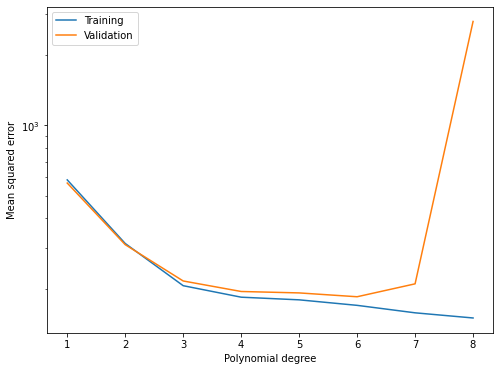

In [29]:
err_train = []
err_cv = []

for degree in range(1,9):

    # fit model
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=662)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=(0.2/0.7),random_state=662)
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(X_train, y_train)

    # compute errors
    err_train.append(mean_squared_error(poly_reg_model.predict(X_train), y_train))
    err_cv.append(mean_squared_error(poly_reg_model.predict(X_val), y_val))

plt.figure(figsize = (8,6))
plt.semilogy(range(1,9), err_train, range(1, 9), err_cv)
plt.legend(["Training", "Validation"])
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared error")

In [30]:
# Polynomial regression with ideal degree (6)
X = feature_set[["max_temp","precip","is_weekday","hour"]]
y = feature_set["trips"]
poly = PolynomialFeatures(degree=6, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=662)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=(0.2/0.7),random_state=662)

In [31]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
poly_reg_y_predicted = poly_reg_model.predict(X_test)
print("Coefficients ", poly_reg_model.coef_, "\nIntercept ", poly_reg_model.intercept_ )

Coefficients  [ 3.50354794e+02  1.45898111e+04  8.40712304e+01  1.28695451e+02
 -3.44236189e+01 -3.47682734e+03 -2.15021751e+01 -3.08921241e+01
  1.45887202e+04 -1.02328328e+04 -1.15592166e+02  7.82440913e+01
 -6.05771686e+00 -2.52259369e+00  1.63116646e+00  2.14660582e+02
  2.20467572e+00  2.55782979e+00 -3.47783070e+03  3.92625239e+03
 -1.61376810e+01 -2.16466882e+01  2.10571675e+00  8.93777687e-01
  1.45878227e+04 -1.02322987e+04 -1.16341029e+02 -1.02323166e+04
  3.22623284e+02 -8.46406588e-01  7.72981212e+01 -7.12388621e+00
  2.63400802e-01 -6.23966718e-02 -3.69519788e-02  1.10116162e+01
 -9.81479081e-02 -9.77391381e-02  2.14565439e+02 -6.26974153e+02
  5.47781596e+00  2.17790670e+00 -2.21250531e-01 -6.19650843e-02
 -3.47782068e+03  3.92625982e+03 -1.61482750e+01  3.92625986e+03
 -8.54547471e+01  3.32455132e+00 -2.16581144e+01  2.09104282e+00
  2.27966211e-02 -1.50188406e-02  1.45877792e+04 -1.02323051e+04
 -1.16332380e+02 -1.02323050e+04  3.22609725e+02 -8.44113800e-01
 -1.0232305

In [32]:
print("Test set performance:")

print("MSE:", mean_squared_error(y_test, poly_reg_y_predicted))
print("MAE:", mean_absolute_error(y_test, poly_reg_y_predicted))
print("R2: ", r2_score(y_test, poly_reg_y_predicted))

Test set performance:
MSE: 176.2399427055613
MAE: 9.932497365556017
R2:  0.7547717103033201


As we can see the performance increased significantly.

### Lasso Regression ($L_1$ regularization)
We can also illustrate the effects of regularization as they relate to training and validation performance.  Just as we did with the degree of the polynomial, we can consider the training and validation errors for different amounts of regularization.

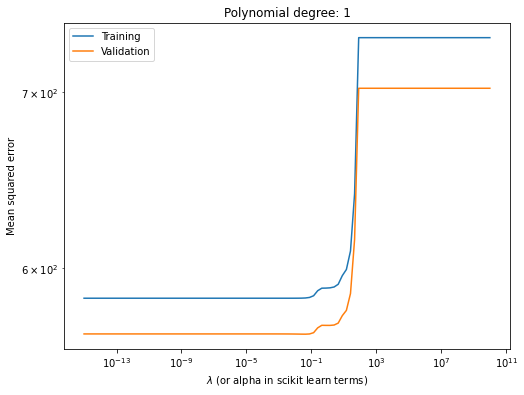

Validation error is minimal for regularization parameter alpha≈0.0433.

Coefficients  [ -0.6230925  -14.81336522   0.54292613   1.79268292] 
Intercept  25.723049788111645

Validation set performance:
MSE: 566.4067079471882
MAE: 19.832438261778126
R2:  0.1935989429876771


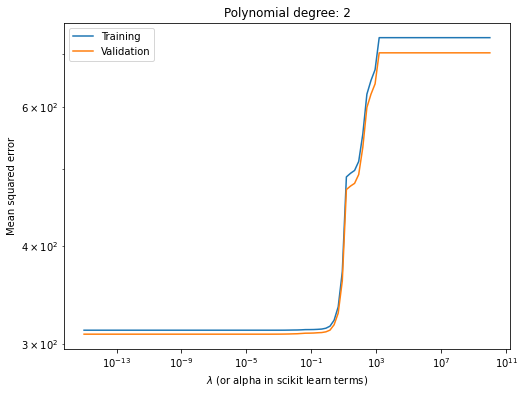

Validation error is minimal for regularization parameter alpha≈0.0002.

Coefficients  [ -0.61882814   7.58885032   0.50628704  12.58128359   0.07021668
  -0.92026116   0.20775752  -0.07967463  14.73268127 -13.00491332
  -0.86636452  -0.70317642  -0.19779427  -0.40339398] 
Intercept  -33.652036052972406

Validation set performance:
MSE: 308.770966305901
MAE: 14.474067066096666
R2:  0.5603985085095231


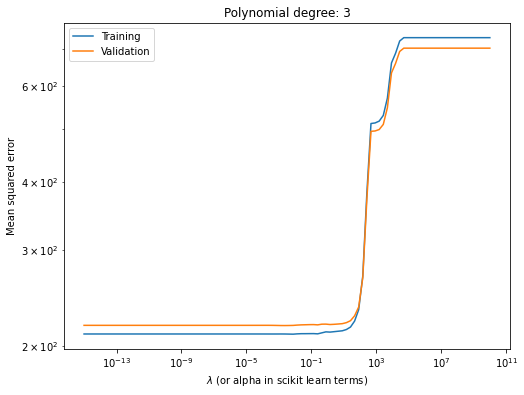

Validation error is minimal for regularization parameter alpha≈0.0024.

Coefficients  [-7.22101860e+00 -0.00000000e+00  5.88507099e+01  1.41014853e+00
  3.75123877e-01  3.42007289e+00  2.57678919e+00  5.70710041e-02
 -0.00000000e+00  0.00000000e+00 -3.64517121e-01 -2.34803199e+01
  5.37818139e+00  6.65908259e-01 -4.67853949e-03 -7.38331728e-02
 -7.37102793e-02 -6.29663432e-03 -9.64747452e-01 -5.87908043e-01
 -7.83032474e-02 -5.83403640e-01  7.38792130e-02  7.63052550e-03
 -0.00000000e+00  0.00000000e+00 -4.19049870e+00  0.00000000e+00
 -2.82251244e-01  2.46651272e-01 -4.33555663e+01 -6.50501016e+00
 -2.08600345e-02 -3.51771856e-02] 
Intercept  30.624357417789305

Validation set performance:
MSE: 217.707926962141
MAE: 11.636677513472657
R2:  0.6900462159805472


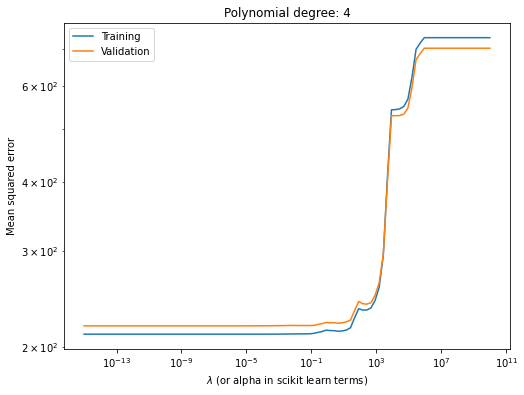

Validation error is minimal for regularization parameter alpha≈0.0000.

Coefficients  [-2.68075332e+00 -1.02572220e+02 -2.93995014e+01  4.50949265e+00
  2.33001528e-01  4.63591508e-01 -5.83900325e-01 -1.07207756e-01
  1.62306580e+01 -1.24796655e+01  1.54028220e-01  1.16168549e+01
  1.55105178e+00  3.77529453e-01 -2.90134680e-03 -2.65957205e-01
 -1.43342740e-01 -8.98985660e-03  5.84096769e-01 -7.05272910e-01
 -4.02773370e-02  2.47876915e+00  3.43882408e-02  8.53426106e-03
  4.20823822e+01 -2.35420624e+01 -1.87375967e+00  2.35261036e+01
 -3.02633437e+00 -1.02467850e-01 -2.06202613e+01 -3.88867367e+00
 -4.40823661e-02 -1.19202351e-02 -3.25441749e-05 -3.12343839e-03
 -1.78236059e-03  7.35804205e-05  1.71241732e-01  1.09135226e-01
  3.93375567e-03  1.27054728e-01  3.50447365e-03  4.09353293e-04
  1.69065444e+00  3.75081829e-02  6.88561287e-02 -8.75735307e-01
 -3.35471499e-01  6.90486196e-03 -3.13720241e-01  4.23059330e-03
 -4.60614132e-03 -4.20399453e-04  3.84516417e+01  1.81184181e+01
  3.

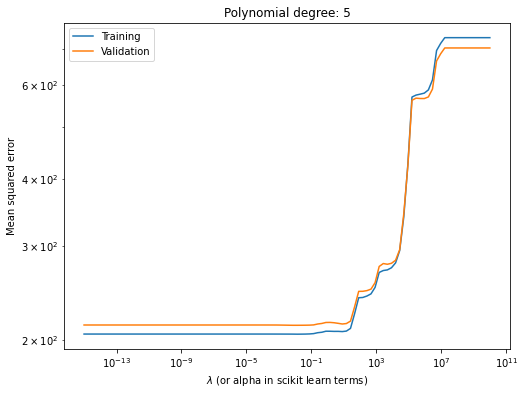

Validation error is minimal for regularization parameter alpha≈0.0076.

Coefficients  [-2.37931641e+00  0.00000000e+00 -2.10684910e+01  4.33645665e+00
  1.34595262e-01  0.00000000e+00 -3.32505788e+00 -3.53984706e-02
  0.00000000e+00 -0.00000000e+00 -1.89451545e+00  0.00000000e+00
 -1.71068354e+00  3.64087712e-01 -5.47866126e-04 -1.47822082e-01
 -6.37798367e-02 -1.07678320e-02 -0.00000000e+00 -4.52943955e-03
 -1.72176299e-01  2.70135751e+00 -7.93732738e-02  1.03033118e-02
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -1.73740967e-01  0.00000000e+00 -3.96736390e+00
 -6.35033451e-02 -1.35578202e-02  1.65887225e-04  1.48917430e-02
  7.96709581e-04 -9.76906785e-05  7.18250047e-02  5.75806880e-02
  2.25320938e-03  7.74840619e-02  2.45303673e-03  3.78686798e-04
  0.00000000e+00 -0.00000000e+00  1.06218016e-01 -0.00000000e+00
 -5.02432615e-02 -2.97076361e-03  2.97852567e-01 -7.29922679e-03
 -2.38406904e-03 -4.77989485e-04  0.00000000e+00 -0.00000000e+00
  2.

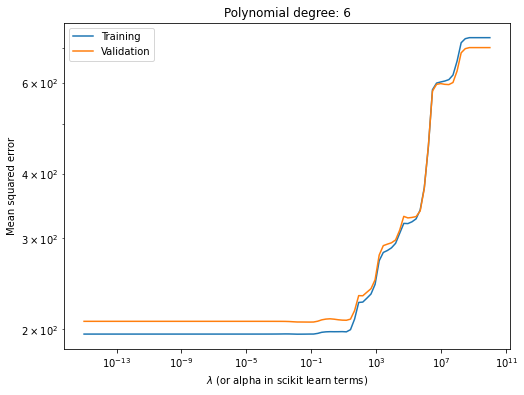

Validation error is minimal for regularization parameter alpha≈0.0774.

Coefficients  [-0.00000000e+00  0.00000000e+00 -0.00000000e+00  3.05367541e+00
  2.38883868e-02  0.00000000e+00 -2.29571038e+00 -1.00166263e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.85838100e+00  4.55886015e-01 -2.31800349e-03 -3.03565702e-02
 -6.17653208e-02 -1.14209704e-02 -0.00000000e+00 -0.00000000e+00
 -2.22352739e-01  1.70099323e+00 -1.54108010e-01  1.22446319e-02
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.26190251e-01  0.00000000e+00 -3.14579107e+00
 -9.06431645e-02 -1.31359395e-02  2.56045513e-04  1.59079958e-02
  2.76296331e-03 -1.10550283e-04  0.00000000e+00 -0.00000000e+00
  4.40426867e-03  7.43041948e-02 -6.96970699e-04  3.65578697e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.36310676e-02 -1.42815469e-03  5.66116191e-01 -4.93254921e-02
 -4.52422646e-04 -4.95081796e-04  0.00000000e+00  0.00000000e+00
  0.

In [33]:
ideal_r2_score_lasso = 0
ideal_degree_lasso = 1
ideal_alpha_lasso = 0
    
for degree in range(1,7):

    # fit model
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=662)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=(0.2/0.7),random_state=662)
    
    err_train = []
    err_cv = []
    
    ideal_r2_score = 0
    
    for alpha in np.logspace(-15,10,100):
    
        # fit model
        model_L1 = Lasso(alpha = alpha)
        model_L1.fit(X_train, y_train)
    
        # compute errors
        err_train.append(mean_squared_error(model_L1.predict(X_train), y_train))
        
        prediction = model_L1.predict(X_val)
        err_cv.append(mean_squared_error(prediction, y_val))
        
       
        
        if(r2_score(y_val, prediction) > ideal_r2_score):
            ideal_r2_score = r2_score(y_val, prediction)
            ideal_alpha = alpha
    
    #Plot errors
    plt.figure(figsize = (8,6))
    plt.loglog(np.logspace(-15,10,100), err_train, np.logspace(-15,10,100), err_cv)
    plt.title(f"Polynomial degree: {degree}")
    plt.legend(["Training", "Validation"])
    plt.xlabel("$\lambda$ (or alpha in scikit learn terms)")
    plt.ylabel("Mean squared error")
    plt.show()
    
    print(f"Validation error is minimal for regularization parameter alpha≈{ideal_alpha:.4f}.")
    
    # fit with ideal para
    model_L1 = Lasso(alpha = ideal_alpha)
    model_L1.fit(X_train, y_train)
    prediction = model_L1.predict(X_val)
    print("\nCoefficients ", model_L1.coef_, "\nIntercept ", model_L1.intercept_ )
    
    print("\nValidation set performance:")

    print("MSE:", mean_squared_error(y_val, prediction))
    print("MAE:", mean_absolute_error(y_val, prediction))
    print("R2: ", r2_score(y_val, prediction))
    
    if(ideal_r2_score > ideal_r2_score_lasso): 
        ideal_r2_score_lasso = ideal_r2_score
        ideal_degree_lasso = degree
        ideal_alpha_lasso = ideal_alpha

As we can see, the performance did not improve much from degree 3. With a higher degree, the performance would probably still increase, but it would require much more computing power.

In [34]:
print("Ideal hyperparameters for Lasso regression:")
print(f"Degree of polynomial: {ideal_degree_lasso}")
print(f"Regularization parameter alpha: {ideal_alpha_lasso:.4f}")

Ideal hyperparameters for Lasso regression:
Degree of polynomial: 6
Regularization parameter alpha: 0.0774


In [35]:
#Lasso regression with ideal hyperparameters
poly = PolynomialFeatures(degree=ideal_degree_lasso, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=662)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=(0.2/0.7),random_state=662)

In [36]:
model_L1 = Lasso(alpha = ideal_alpha_lasso)
model_L1.fit(X_train, y_train)
prediction = model_L1.predict(X_test)
print("Coefficients ", model_L1.coef_, "\nIntercept ", model_L1.intercept_ )

Coefficients  [-0.00000000e+00  0.00000000e+00 -0.00000000e+00  3.05367541e+00
  2.38883868e-02  0.00000000e+00 -2.29571038e+00 -1.00166263e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.85838100e+00  4.55886015e-01 -2.31800349e-03 -3.03565702e-02
 -6.17653208e-02 -1.14209704e-02 -0.00000000e+00 -0.00000000e+00
 -2.22352739e-01  1.70099323e+00 -1.54108010e-01  1.22446319e-02
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.26190251e-01  0.00000000e+00 -3.14579107e+00
 -9.06431645e-02 -1.31359395e-02  2.56045513e-04  1.59079958e-02
  2.76296331e-03 -1.10550283e-04  0.00000000e+00 -0.00000000e+00
  4.40426867e-03  7.43041948e-02 -6.96970699e-04  3.65578697e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.36310676e-02 -1.42815469e-03  5.66116191e-01 -4.93254921e-02
 -4.52422646e-04 -4.95081796e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.49852062e-03
  0.0000000

In [37]:
print("Test set performance for ideal hyperparameters:")

print("MSE:", mean_squared_error(y_test, prediction))
print("MAE:", mean_absolute_error(y_test, prediction))
print("R2: ", r2_score(y_test, prediction))

Test set performance for ideal hyperparameters:
MSE: 196.80516102683708
MAE: 10.831514864117866
R2:  0.7261563281218202


### Ridge Regression ($L_2$ Regularization)

We can also illustrate the effects of regularization as they relate to training and validation performance.  Just as we did with the degree of the polynomial, we can consider the training and validation errors for different amounts of regularization.

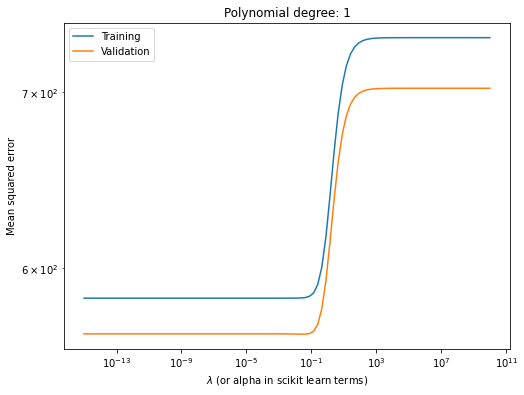

Validation error is minimal for regularization parameter alpha≈0.0242.

Coefficients  [ -0.60323896 -16.90913311   0.74367993   1.74926214] 
Intercept  25.76707786736401

Validation set performance:
MSE: 566.3676792082335
MAE: 19.870484085694784
R2:  0.19365450874264667


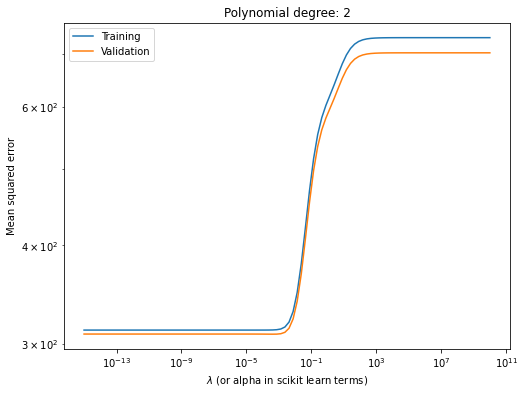

Validation error is minimal for regularization parameter alpha≈0.0004.

Coefficients  [ -0.63265361  10.91559285  -0.10609695  12.26852143   0.06722923
  -0.91735255   0.19589235  -0.07114533  10.91559285 -13.12021729
  -0.82649629  -0.10609695  -0.17893774  -0.39765294] 
Intercept  -31.618136565051657

Validation set performance:
MSE: 308.65781196183826
MAE: 14.484382749440396
R2:  0.5605596079127919


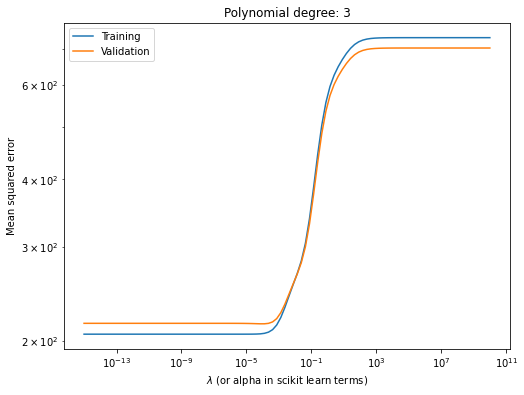

Validation error is minimal for regularization parameter alpha≈0.0001.

Coefficients  [-5.86182380e+00 -2.43558955e+00 -6.87084197e+00  7.26519208e-01
  3.49185587e-01  6.80630130e-01  1.54162222e+00 -1.44128526e-01
 -2.43558953e+00  1.33438035e+01 -2.52482679e+00 -6.87084197e+00
 -2.80508164e-01  8.82265084e-01 -5.38458533e-03  1.40034908e-02
 -1.02549307e-01  5.76737542e-04  6.80630130e-01 -3.05572653e+00
 -3.05300235e-02  1.54162222e+00  8.16923549e-02  5.03057012e-03
 -2.43558953e+00  1.33438035e+01 -2.52482679e+00  1.33438035e+01
 -3.62051754e-01  2.39159972e-01 -6.87084197e+00 -2.80508164e-01
 -5.03278960e-02 -3.91530531e-02] 
Intercept  24.456640306795244

Validation set performance:
MSE: 215.47235384933975
MAE: 11.42885357982955
R2:  0.6932290323135757


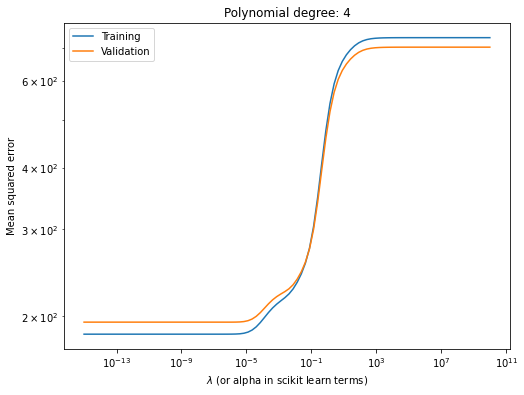

Validation error is minimal for regularization parameter alpha≈0.0000.

Coefficients  [-6.91694578e+00 -3.71650532e+01 -7.83683460e+00 -1.14684405e+01
  3.44027764e-01  1.09351565e+01  2.39466432e+00 -2.82243408e-01
 -3.71650490e+01  9.41743003e+00 -2.17355376e+00 -7.83683466e+00
 -2.12031497e-01  3.02964492e+00 -9.69463100e-04 -1.10988766e+00
 -2.60479850e-01  1.14714525e-02  1.09351565e+01 -4.13347425e+00
  7.76961550e-01  2.39466432e+00  2.85235643e-01 -8.49240450e-04
 -3.71650535e+01  9.41742940e+00 -2.17355340e+00  9.41742949e+00
  1.35175248e+00 -4.33902317e-01 -7.83683474e+00 -2.12031528e-01
 -2.65789526e-01 -1.62989893e-01 -1.38484662e-04  4.27109689e-02
  1.04892853e-02 -3.62271167e-04 -1.10988766e+00  6.40172913e-01
 -4.99816482e-02 -2.60479850e-01 -7.94359494e-03  7.73571380e-04
  1.09351565e+01 -4.13347416e+00  7.76961550e-01 -4.13347416e+00
 -7.89693408e-01  2.67870793e-02  2.39466432e+00  2.85235644e-01
 -1.07189502e-02 -7.32816654e-04 -3.71650533e+01  9.41742934e+00
 -2.

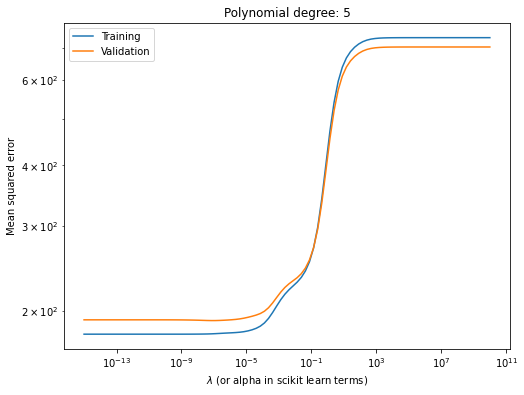

Validation error is minimal for regularization parameter alpha≈0.0000.

Coefficients  [ 3.18301006e+01 -5.00768858e+01 -2.74816067e+00 -2.62121696e+01
 -4.62127215e+00 -7.65641127e+00 -1.91335364e+00  9.72801675e-01
 -5.00768815e+01  1.59522963e+02 -6.34669665e+00 -2.74816247e+00
  5.21832182e+00  3.68789736e+00  2.80725875e-01  4.23767907e+00
  3.49489670e-01 -2.14410356e-02 -7.65641199e+00 -5.28905199e+01
  1.85575704e+00 -1.91335379e+00 -1.19380246e-01 -8.66626093e-02
 -5.00769059e+01  1.59522953e+02 -6.34669781e+00  1.59522966e+02
 -4.25468476e+00  7.69583771e-02 -2.74815486e+00  5.21832191e+00
 -9.96571852e-01 -9.03777748e-02 -7.67166569e-03 -4.85268818e-01
 -2.36299328e-02  7.18880393e-04  4.23767918e+00  6.91559950e+00
 -1.74207885e-01  3.49489672e-01 -8.82376104e-03  1.03303495e-03
 -7.65641247e+00 -5.28905195e+01  1.85575700e+00 -5.28905194e+01
  1.09293740e+00 -6.90210381e-02 -1.91335382e+00 -1.19380250e-01
  4.36199709e-02  1.89824007e-03 -5.00769037e+01  1.59522942e+02
 -6.

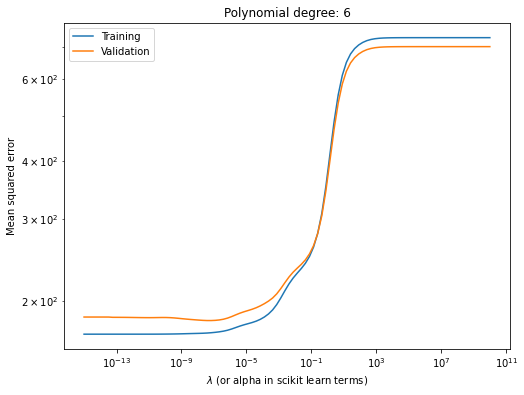

Validation error is minimal for regularization parameter alpha≈0.0000.

Coefficients  [ 2.86798362e+01  1.36113806e+02  5.66352293e+00 -1.62524828e+01
 -3.13256959e+00 -4.81270805e+01 -2.78631491e+00  9.78338678e-02
  1.36113804e+02  1.36380500e+02 -5.04537814e+00  5.66352938e+00
  1.03328840e+00  2.26724906e+00  1.12804877e-01  4.89585393e+00
  2.88521538e-01  2.65739496e-02 -4.81270805e+01 -4.00636381e+01
  2.80713225e-02 -2.78631488e+00  2.33215784e-01 -3.67058843e-02
  1.36113801e+02  1.36380501e+02 -5.04537925e+00  1.36380501e+02
  1.12249451e+00  3.08579145e-01  5.66352434e+00  1.03328748e+00
  6.81092598e-02 -3.71602438e-02  8.35349545e-04  1.85863994e-02
 -6.60624748e-03  7.46644925e-04  4.89585394e+00  4.18673309e+00
  2.05214174e-01  2.88521548e-01 -5.20150603e-02 -1.73710299e-03
 -4.81270816e+01 -4.00636396e+01  2.80713486e-02 -4.00636396e+01
 -1.28091910e+00 -3.57589326e-04 -2.78631505e+00  2.33215797e-01
  6.04481366e-02 -3.55615667e-03  1.36113810e+02  1.36380507e+02
 -5.

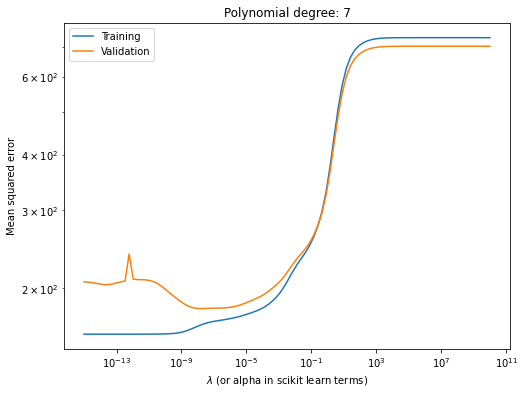

Validation error is minimal for regularization parameter alpha≈0.0000.

Coefficients  [ 6.99130452e+01  2.19792251e+02  7.92344559e+00  3.82121058e+00
 -6.21188365e+00 -3.88202369e+01 -2.03415625e+00 -2.91901759e+00
  2.19792461e+02 -5.48779079e+01  2.27994605e+01  7.92347899e+00
 -3.62412260e-01  6.09705768e-01  1.94885908e-01  3.57993606e-01
  8.70882166e-02  1.80421015e-01 -3.88202489e+01  1.27668192e+01
 -7.12398545e+00 -2.03415343e+00 -2.16648818e-01 -8.22013361e-03
  2.19792476e+02 -5.48778750e+01  2.27994623e+01 -5.48778897e+01
  2.12764610e+01  1.36985761e-02  7.92353680e+00 -3.62413385e-01
  1.06354387e+00  2.26277269e-01  1.44383351e-03  2.55162289e-01
  9.55267872e-03  3.77493625e-04  3.57996776e-01 -9.63057535e-01
  4.93728558e-01  8.70881656e-02  3.22165331e-02 -1.55985277e-03
 -3.88202490e+01  1.27668163e+01 -7.12398486e+00  1.27668171e+01
 -5.59058158e+00  2.38715819e-01 -2.03415502e+00 -2.16648859e-01
  3.39661283e-02  4.55902116e-03  2.19792418e+02 -5.48779518e+01
  2.

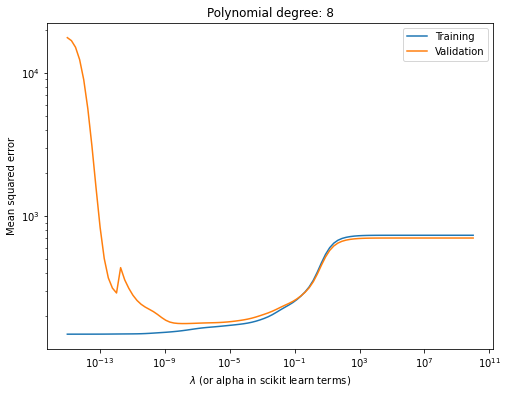

Validation error is minimal for regularization parameter alpha≈0.0000.

Coefficients  [ 8.38315384e+01  7.92985992e+01 -6.06264912e+00  2.86763756e+01
 -6.48964308e+00 -1.48438170e+00  2.08410803e+00 -3.84067622e+00
  7.92989540e+01 -2.24056707e+02  6.16247788e+01 -6.06265786e+00
 -2.48222064e+00 -4.43835262e+00  1.39733060e-01 -2.25008626e+00
 -2.07793301e-01  1.48793727e-01 -1.48437750e+00  5.68821829e+01
 -1.27045186e+01  2.08410780e+00 -4.18323473e-01 -1.68166189e-03
  7.92980801e+01 -2.24056430e+02  6.16247848e+01 -2.24056736e+02
  2.31377731e+01  3.33914340e+00 -6.06265420e+00 -2.48222941e+00
  1.64910548e+00  8.19567418e-01  4.88160228e-03  1.40117398e-01
  3.68019220e-03  1.48110301e-03 -2.25008633e+00 -4.01005205e+00
  2.88491777e-01 -2.07793297e-01  6.58531734e-02  2.15359027e-03
 -1.48440926e+00  5.68821103e+01 -1.27045121e+01  5.68821091e+01
 -5.36577175e+00 -6.78289147e-02  2.08411492e+00 -4.18325170e-01
 -2.68217033e-02  1.40830425e-02  7.92986409e+01 -2.24056771e+02
  6.

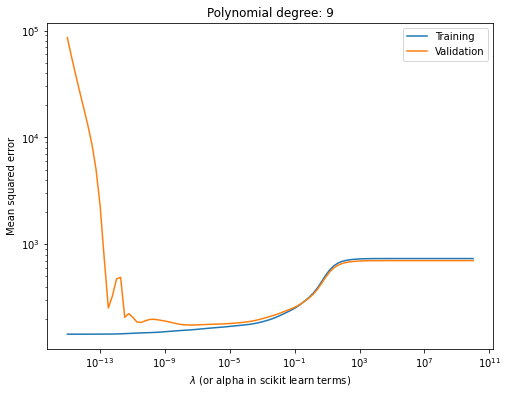

Validation error is minimal for regularization parameter alpha≈0.0000.

Coefficients  [ 5.40598718e+01  4.95181154e+01 -5.02122187e+00  1.46461657e+01
 -3.93458561e+00 -7.17659883e-01  1.54376758e+00 -2.00804840e+00
  4.95180879e+01 -1.14279017e+02  2.87499163e+01 -5.02121027e+00
 -1.50623381e+00 -2.36169823e+00  6.26292806e-02 -1.04600813e+00
 -1.42459901e-01  5.39227107e-02 -7.17648706e-01  2.52386085e+01
 -5.25851861e+00  1.54376765e+00 -2.23685447e-01 -1.44519187e-02
  4.95181863e+01 -1.14278909e+02  2.87499171e+01 -1.14278997e+02
  1.19602307e+01  2.47138043e+00 -5.02120824e+00 -1.50623825e+00
  8.57014756e-01  4.51662310e-01  3.39113193e-03  3.02779498e-02
  1.49436151e-03  1.76941953e-03 -1.04600724e+00 -1.24755811e+00
  8.68842328e-03 -1.42459909e-01  3.18650552e-02  1.19732783e-03
 -7.17646924e-01  2.52386122e+01 -5.25851862e+00  2.52386117e+01
 -2.52096991e+00 -8.10205575e-02  1.54376753e+00 -2.23685510e-01
 -6.30007684e-03  8.54085640e-03  4.95183591e+01 -1.14279210e+02
  2.

In [38]:
ideal_r2_score_ridge = 0
ideal_degree_ridge = 0
ideal_alpha_ridge = 0
    
for degree in range(1,10):

    # fit model
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=662)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=(0.2/0.7),random_state=662)
    
    err_train = []
    err_cv = []
    
    ideal_r2_score = 0
    
    for alpha in np.logspace(-15,10,100):
    
        # fit model
        model_L2 = Ridge(alpha = alpha, normalize = True, solver = 'auto') # select least squares regression as solver
        model_L2.fit(X_train, y_train)
    
        # compute errors
        err_train.append(mean_squared_error(model_L2.predict(X_train), y_train))
        
        prediction = model_L2.predict(X_val)
        err_cv.append(mean_squared_error(prediction, y_val))
        
       
        
        if(r2_score(y_val, prediction) > ideal_r2_score):
            ideal_r2_score = r2_score(y_val, prediction)
            ideal_alpha = alpha
    
    #Plot errors
    plt.figure(figsize = (8,6))
    plt.loglog(np.logspace(-15,10,100), err_train, np.logspace(-15,10,100), err_cv)
    plt.title(f"Polynomial degree: {degree}")
    plt.legend(["Training", "Validation"])
    plt.xlabel("$\lambda$ (or alpha in scikit learn terms)")
    plt.ylabel("Mean squared error")
    plt.show()
    
    print(f"Validation error is minimal for regularization parameter alpha≈{ideal_alpha:.4f}.")
    
    # fit with ideal para
    model_L2 = Ridge(alpha = ideal_alpha, normalize = True, solver = 'auto')
    model_L2.fit(X_train, y_train)
    prediction = model_L2.predict(X_val)
    print("\nCoefficients ", model_L2.coef_, "\nIntercept ", model_L2.intercept_ )
    
    print("\nValidation set performance:")

    print("MSE:", mean_squared_error(y_val, prediction))
    print("MAE:", mean_absolute_error(y_val, prediction))
    print("R2: ", r2_score(y_val, prediction))
    
    if(ideal_r2_score > ideal_r2_score_ridge): 
        ideal_r2_score_ridge = ideal_r2_score
        ideal_degree_ridge = degree
        ideal_alpha_ridge = ideal_alpha

As we can see, the performance did not improve much from degree 6. With a higher degree, the performance would probably still increase, but it would require much more computing power.

In [39]:
print("Ideal hyperparameters for ridge regression:")
print(f"Degree of polynomial: {ideal_degree_ridge}")
print(f"Regularization parameter alpha: {ideal_alpha_ridge:.4f}")

Ideal hyperparameters for ridge regression:
Degree of polynomial: 9
Regularization parameter alpha: 0.0000


In [40]:
#Ridge regression with ideal hyperparameters
poly = PolynomialFeatures(degree=ideal_degree_ridge, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=662)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=(0.2/0.7),random_state=662)

In [41]:
model_L2 = Ridge(alpha = ideal_alpha_ridge, normalize = True, solver = 'auto')
model_L2.fit(X_train, y_train)
prediction = model_L2.predict(X_test)
print("Coefficients ", model_L2.coef_, "\nIntercept ", model_L2.intercept_ )

Coefficients  [ 5.40598718e+01  4.95181154e+01 -5.02122187e+00  1.46461657e+01
 -3.93458561e+00 -7.17659883e-01  1.54376758e+00 -2.00804840e+00
  4.95180879e+01 -1.14279017e+02  2.87499163e+01 -5.02121027e+00
 -1.50623381e+00 -2.36169823e+00  6.26292806e-02 -1.04600813e+00
 -1.42459901e-01  5.39227107e-02 -7.17648706e-01  2.52386085e+01
 -5.25851861e+00  1.54376765e+00 -2.23685447e-01 -1.44519187e-02
  4.95181863e+01 -1.14278909e+02  2.87499171e+01 -1.14278997e+02
  1.19602307e+01  2.47138043e+00 -5.02120824e+00 -1.50623825e+00
  8.57014756e-01  4.51662310e-01  3.39113193e-03  3.02779498e-02
  1.49436151e-03  1.76941953e-03 -1.04600724e+00 -1.24755811e+00
  8.68842328e-03 -1.42459909e-01  3.18650552e-02  1.19732783e-03
 -7.17646924e-01  2.52386122e+01 -5.25851862e+00  2.52386117e+01
 -2.52096991e+00 -8.10205575e-02  1.54376753e+00 -2.23685510e-01
 -6.30007684e-03  8.54085640e-03  4.95183591e+01 -1.14279210e+02
  2.87499243e+01 -1.14279187e+02  1.19602399e+01  2.47138067e+00
 -1.1427917

In [42]:
print("Test set performance for ideal hyperparameters:")

print("MSE:", mean_squared_error(y_test, prediction))
print("MAE:", mean_absolute_error(y_test, prediction))
print("R2: ", r2_score(y_test, prediction))

Test set performance for ideal hyperparameters:
MSE: 162.157879642429
MAE: 9.497595418594694
R2:  0.7743661347417239


### Tree Regression

In [43]:
X = feature_set[["max_temp","precip","is_weekday","hour"]]
Y = feature_set["trips"]

# Do a 70-30 split first
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.3,random_state=662 )

# now split X_train to achive 50-20-30 split
x_train2, x_hold2, y_train2, y_hold2 = train_test_split(x_train2, y_train2, test_size=(0.2/0.7),random_state=662 )

def find_tree_depth (x,y):
    
    # define list for collecting results
    err_train = [] 
    err_test  = []
    
    # split data
    # x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=10)
    
    #loop over max_depth
    
    for n in np.arange(1,21): # lets test until 24 for now
        
        # fit model
        
        tree_reg = DecisionTreeRegressor(max_depth=n)
        tree_model = tree_reg.fit(x_train2,y_train2)
        
        # compute errors
        
        err_train.append(mean_absolute_error(y_train2, tree_model.predict(x_train2)))
        err_test.append(mean_absolute_error(y_hold2, tree_model.predict(x_hold2)))


    plt.figure(figsize = (8,6))
    plt.plot(np.arange(1,21), err_train,np.arange(1,21), err_test)
    plt.legend(["Training", "Holdout"])
    plt.xlabel("Max Tree Depth")
    plt.ylabel("MAE")
    plt.title("Search over max_depth parameter",fontsize=14)
    plt.show()

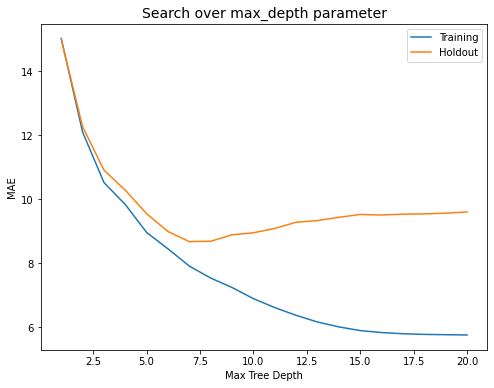

In [44]:
find_tree_depth (X,Y)

In [45]:
# Fit regression model with ideal maximal tree depth
Tree_reg   = DecisionTreeRegressor(max_depth=7)
tree_model = Tree_reg.fit(x_train2, y_train2) 

# Predict
y_hat_tree = tree_model.predict(x_test2)

# Test set performance
print("Test set performance for ideal hyperparameters:")

print("MSE:",mean_squared_error(y_test2, y_hat_tree))
print("MAE:",mean_absolute_error(y_hat_tree, y_test2))
# print("RMSE:",(mean_squared_error(y_hat_tree, y_test2))**(0.5)) 
print("R2:",r2_score(y_hat_tree, y_test2))

Test set performance for ideal hyperparameters:
MSE: 142.40208664662978
MAE: 8.337243968580632
R2: 0.7603879285504604
